#PS4 Spring 2021
#Hailee Kiesecker 
###Due: April 25th 2021

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.cluster import DBSCAN

In [ ]:
X,y=iris['data'],iris['target']
X=StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Z=pca.fit_transform(X)

In [ ]:
X0 = Z[:,0]
y0= Z[:,1]

# Question 1 (10 pts)
Use K-means from scikit learn to estimate the best number of clusters

Text(0.5, 1.0, 'Target')

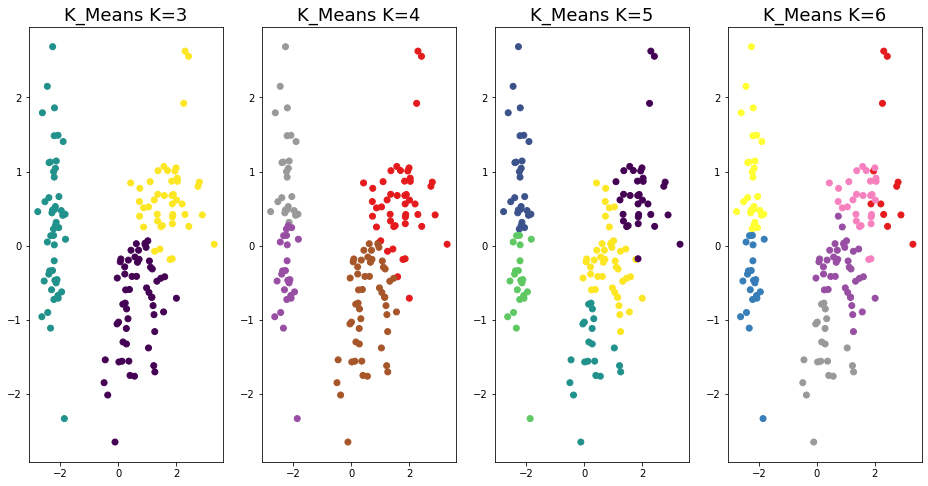

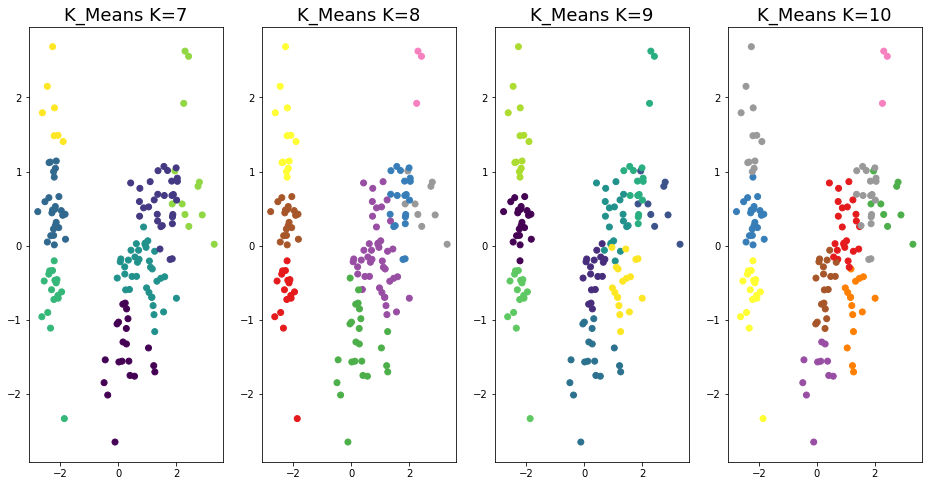

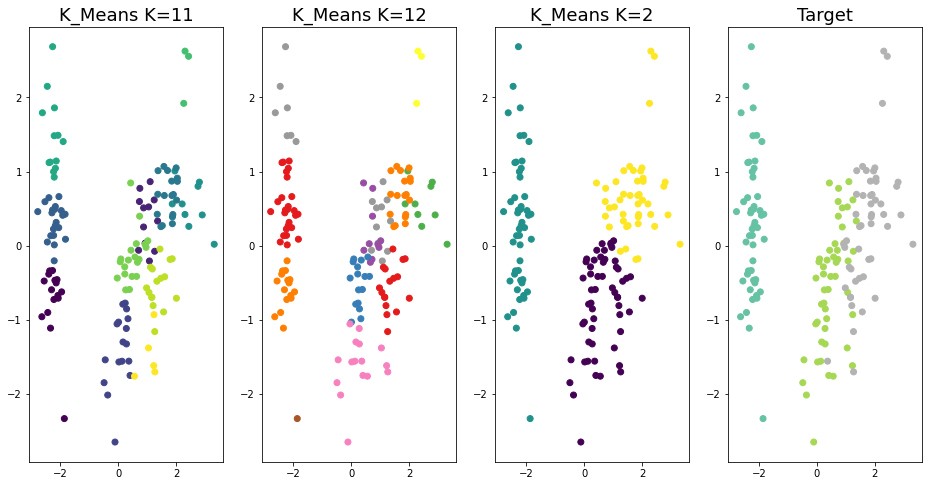

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16,8))
fig, axes1 = plt.subplots(1, 4, figsize=(16,8))
fig, axes2 = plt.subplots(1, 4, figsize=(16,8))

print(axes)
#km0=KMeans(n_clusters=1).fit(X)
km1=KMeans(n_clusters=2).fit(X)

km2=KMeans(n_clusters=3).fit(X)
km3=KMeans(n_clusters=4).fit(X)

km4=KMeans(n_clusters=5).fit(X)
km5=KMeans(n_clusters=6).fit(X)

km6=KMeans(n_clusters=7).fit(X)
km7=KMeans(n_clusters=8).fit(X)

km8=KMeans(n_clusters=9).fit(X)
km9=KMeans(n_clusters=10).fit(X)

km10=KMeans(n_clusters=11).fit(X)
km11=KMeans(n_clusters=12).fit(X)

#axes[0].scatter(Z[:,0], Z[:,1], c=km0.predict(X))
# axes[1].scatter(Z[:,0], Z[:,1], c=km1.predict(X), cmap=plt.cm.Set1)

axes[0].scatter(X0, y0, c=km2.predict(X))
axes[1].scatter(Z[:,0], Z[:,1], c=km3.predict(X), cmap=plt.cm.Set1)

axes[2].scatter(Z[:,0], Z[:,1], c=km4.predict(X))
axes[3].scatter(Z[:,0], Z[:,1], c=km5.predict(X), cmap=plt.cm.Set1)

axes1[0].scatter(Z[:,0], Z[:,1], c=km6.predict(X))
axes1[1].scatter(Z[:,0], Z[:,1], c=km7.predict(X), cmap=plt.cm.Set1)

axes1[2].scatter(Z[:,0], Z[:,1], c=km8.predict(X))
axes1[3].scatter(Z[:,0], Z[:,1], c=km9.predict(X), cmap=plt.cm.Set1)

axes2[0].scatter(Z[:,0], Z[:,1], c=km10.predict(X))
axes2[1].scatter(Z[:,0], Z[:,1], c=km11.predict(X), cmap=plt.cm.Set1)

axes2[2].scatter(X0, y0, c=km2.predict(X))
axes2[3].scatter(Z[:,0], Z[:,1], c=y, cmap=plt.cm.Set2)


# ======title =========
axes[0].set_title('K_Means K=3', fontsize=18)
axes[1].set_title('K_Means K=4', fontsize=18)

axes[2].set_title('K_Means K=5', fontsize=18)
axes[3].set_title('K_Means K=6', fontsize=18)

axes1[0].set_title('K_Means K=7', fontsize=18)
axes1[1].set_title('K_Means K=8', fontsize=18)

axes1[2].set_title('K_Means K=9', fontsize=18)
axes1[3].set_title('K_Means K=10', fontsize=18)

axes2[0].set_title('K_Means K=11', fontsize=18)
axes2[1].set_title('K_Means K=12', fontsize=18)

axes2[2].set_title('K_Means K=2', fontsize=18)
axes2[3].set_title('Target', fontsize=18)

Question does not go into detail if we are supposed to confirm numerically what the best number of clusters is. Visually K=2 and K=3 are equivelent to eachother as the best number of clusters.

In [ ]:
# numerically we can do a test set and see which has the best estimations
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 

y_pred0 = km1.predict(X)
y_pred1 = km2.predict(X)

print(accuracy_score(y, y_pred0) )
print(precision_score(y, y_pred0, average='weighted'))

print(accuracy_score(y, y_pred1) )
print(precision_score(y, y_pred1, average='weighted'))


0.0
0.0
0.22
0.25


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It looks like cluster of 3 is the best.

# Question 2 (15 pts)
Use DBscan (try with different parameters) and K-means (K=3) on IRIS Dataset and discuss/compare the results
with the iris ground truth. Please provide an explanation of why K-fold cross validation is not required for the
comparison among these different algorithms.

In [ ]:
db=[]
K = range(1,200)
for k in K:
    cluster = DBSCAN(eps=k, min_samples=(k-1)).fit_predict(X)
    score = accuracy_score(y, cluster)
    db.append(score)

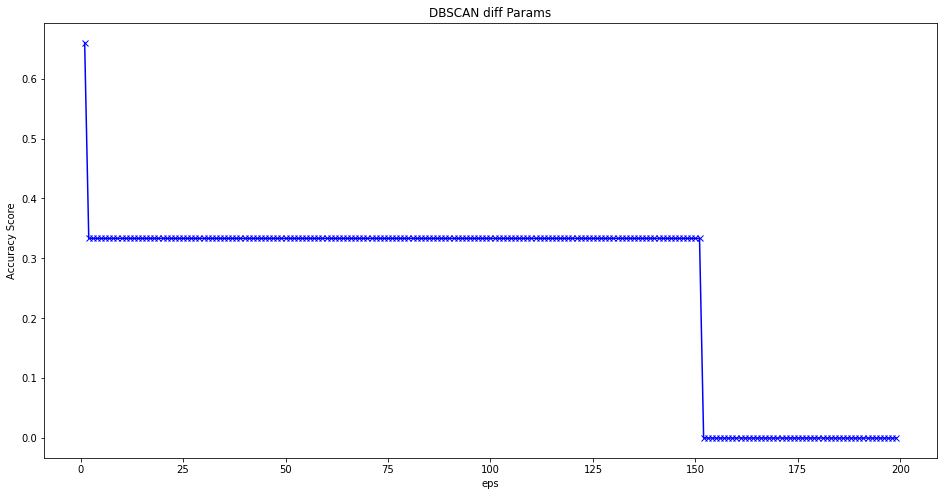

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(K, db, 'bx-')
plt.xlabel('eps')
plt.ylabel('Accuracy Score')
plt.title('DBSCAN diff Params')
plt.show()

Text(0.5, 0, 'min_sample')

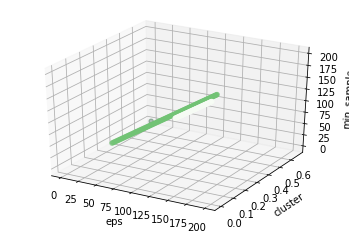

In [ ]:
ax = plt.axes(projection='3d')
Kz = range(0,199)
ax.scatter3D(K, db, Kz,c= db, cmap='Greens')
ax.set_xlabel('eps')
ax.set_ylabel('cluster')
ax.set_zlabel('min_sample')

In [ ]:
 cluster = DBSCAN(eps=1, min_samples=(0)).fit_predict(X)
score = accuracy_score(y, cluster)

In [ ]:
score # this is the highest score with average of --

0.66

In [ ]:
clusterAvg = DBSCAN(eps=5, min_samples=(4)).fit_predict(X)
scoreAvg = accuracy_score(y, clusterAvg)
scoreAvg

0.3333333333333333

You can see from Q1 that the accuracy score using a K-means of 3 is around (.22 +- .05) while using DBSCAN with the same data gives us an accuracy score of around (.33).

It can be concluded that using DBSCAN with the iris dataset outpreforms k-means. However neither of them are acting optimially. Maybe if I used a different metric for scoring? Perhaps I am missing a key factor in discovering their true potential. Right now it seems nearly anything will classify this data better than these two methods.

K- fold cross validation is not required for these two methods of implementation. Using clustering methods they are classifying the incoming data based on the centroids of clusters in the past data. Seperating out the incoming data into different parts would cause multiple centroids forming depending on what is in that fold causing error in classificiation. 

# Extra credit (5 pts)
Implement DBScan by using the KD-tree (you can use for the KD-tree the implementation in scikit or Numpy).
Note that the KD-tree is used for K-nearest neighbor.